<a href="https://colab.research.google.com/github/BernardoSch/PCom/blob/main/Atividade_1_Filtragem_e_Transformada_de_Fourier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Princípios de Comunicação
## Atividade Computacional 1 - Filtragem e Transformada de Fourier

Nesta atividade iremos exercitar alguns aspectos básicos da manipulação de sinais de áudio, sua vizualização, filtragem e obtenção de uma representação de seu espectro. Serão utilizadas algumas bibliotecas do python, de forma a facilidar cada etapa.

Bibliotecas:

*   librosa - Manipulação de arquivos de áudio
*   numpy - Obtenção da Transformada Discreta de Fourier usando o algoritmo FFT
*   scipy - Filtragem de sinais com filtros do tipo butterworth
*   matplotlib - Gráficos


In [ ]:
import librosa
from IPython.display import Audio
import numpy as np
from scipy.signal import butter, filtfilt
import matplotlib.pyplot as plt

**Importando um sinal de áudio**

Podemos usar a biblioteca librosa para carregar um arquivo de áudio. O comando librosa.load carrega o arquivo, sendo que no exemplo, é carregado um arquivo de exemplo da própria biblioteca.

In [ ]:
# Endereço do arquivo de áudio
caminho_arquivo = librosa.ex('brahms')
# Leitura do arquivo como um array numpy considerando a taxa de amostragem original do arquivo
array_audio, taxa_amostragem = librosa.load(caminho_arquivo, sr=None)
# Executando o sinal de áudio
Audio(data=array_audio, rate=taxa_amostragem)

**Mostrando graficamente o sinal de áudio**

O sinal do arquivo de áudio pode ser apresentado usando a função waveshow da biblioteca librosa, a qual gera o eixo x a partir da taxa de amostragem do sinal.

Text(76.09722222222221, 0.5, 'Amplitude')

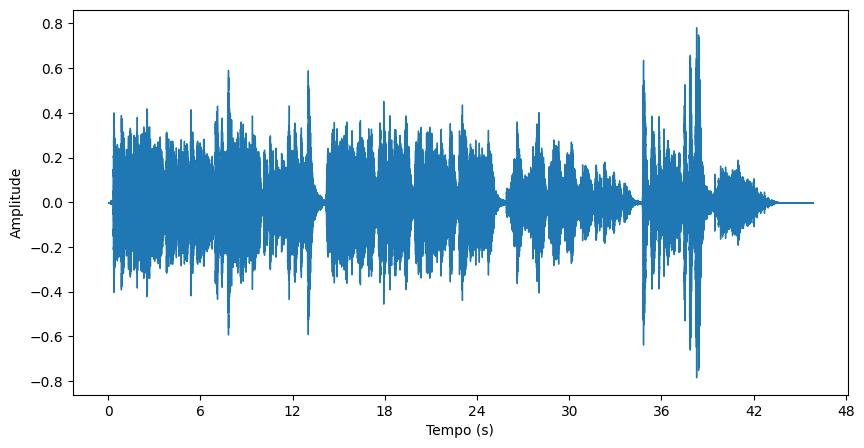

In [ ]:
# Plotando o sinal de áudio
plt.figure(figsize = (10, 5))
librosa.display.waveshow(array_audio, sr=taxa_amostragem)
plt.xlabel('Tempo (s)')
plt.ylabel('Amplitude')
#plt.xlim(0.5,0.6)

**Realizando a transformada de Fourier pela FFT**

Podemos obter a transformada de Fourier usando a função np.fft.fft, a qual retorna a a Transformada Discreta de Fourier. A função retorna os coeficientes do espectro com metade da resolução da frequência de amostragem do sinal no domínio do tempo. Por exemplo, se o sinal foi adquirido em 22 kHz, a FFT retornará os coeficientes entre 0 Hz e 11 kHz.

A função np.fft.fft retornará um vetor com o dobro do tamanho do espectro. A primera metade do vetor consiste nos coeficientes entre 0 Hz e a frequência máxima da FFT, enquanto a segunda metade consiste na porção negativa da Transformada Discreta de Fourier, consistindo nos coeficientes entre -(frequência máxima da FFT) e 0 Hz.

Devido à simetria da transformada, podemos analisar apenas a porção positiva dos coeficientes. Repare que a maior parte da energia do sinal está contida nas componentes de mais baixa frequência.

In [ ]:
# Obtenção da FFT
fft_audio = np.fft.fft(array_audio)
# Criação do array com frequências para plotar os coeficientes
N = len(fft_audio)
n = np.arange(N)
T = N/taxa_amostragem
array_freq = n/T

(0.0, 11025.0)

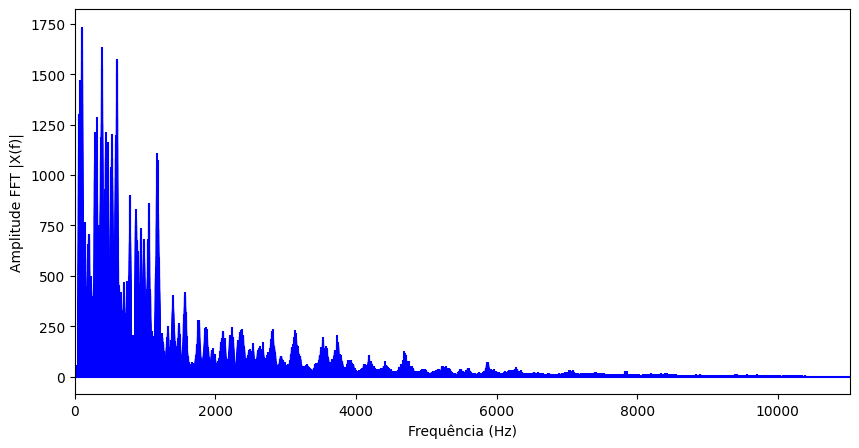

In [ ]:
# Plotando os coeficientes da FFT
plt.figure(figsize = (10, 5))
plt.stem(array_freq, np.abs(fft_audio), 'k', \
         markerfmt=" ", basefmt="-k")
plt.xlabel('Frequência (Hz)')
plt.ylabel('Amplitude FFT |X(f)|')
plt.xlim(0, taxa_amostragem/2)

**Filtragem**

Para filtrar um sinal podemos usar diversas estruturas de filtros. Existem filtros digitais FIR e IIR, sendo que apenas algumas estruturas são implementáveis em circuitos eletrônicos. Um tipo de arquitetura que pode ser usada em circuitos eletrônicos são os filtros *butterworth*, os quais podem ser implementados utilizando a topologia Sallen-Key.

Podemos implementar um filtro *butterworth* passa-baixas utilizando a bilbioteca scipy, e as funções butter() e filtfilt(). A função butter() instancia um filtro *butterworth*, parametrizado por meio de sua frequência de corte, seu tipo (passa-baixas, passa-altas, ...) e sua implementação (analógica, digital). A função filtfilt() aplica um sinal de entrada ao filtro instaciado, retornando o sinal filtrado.

 No exemplo a seguir é apresentado o processo de filtragem do sinal de áudio, utilizando um filtro passa-baixas com frequência de corte $f_c=1000$ Hz.

In [ ]:
# Parâmetros do filtro
freq_corte=1000
ordem=2
tipo_filt='low'
# Instanciação do filtro
b, a = butter(ordem, freq_corte, btype=tipo_filt, analog=False, output='ba', fs=taxa_amostragem)
# Execução da filtragem
array_audio_filtrado = filtfilt(b, a, array_audio)
# Executando o sinal de áudio
Audio(data=array_audio_filtrado, rate=taxa_amostragem)

A execução do sinal filtrado mostra que ao eliminarmos parte da informação do sinal, o volume do áudio foi reduzido, já que parte da energia do sinal foi perdida. Outra mudança evitente é no conteúdo do áudio. Apesar de ele ainda ser parecido com o original, a retirada das informações de alta frequência faz com que o áudio seja diferente, em geral mais grave.

A seguir são apresentados os gráficos da forma de onda do sinal filtrado e da magnitude dos coeficientes da FFT do sinal filtrado, comparando com a do sinal original.

Text(76.09722222222221, 0.5, 'Amplitude')

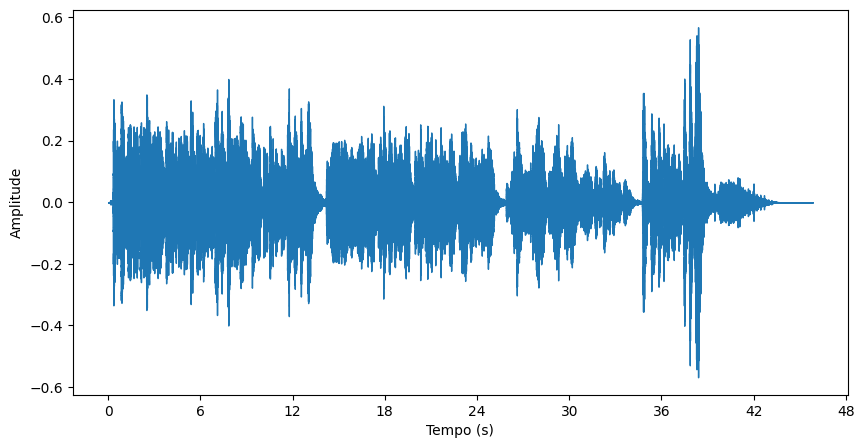

In [ ]:
# Plotando a forma de onda do sinal filtrado
plt.figure(figsize = (10, 5))
librosa.display.waveshow(array_audio_filtrado, sr=taxa_amostragem)
plt.xlabel('Tempo (s)')
plt.ylabel('Amplitude')

In [ ]:
# Obtendo a FFT do sinal filtrado
fft_audio_filtrado = np.fft.fft(array_audio_filtrado)
N = len(fft_audio_filtrado)
n = np.arange(N)
T = N/taxa_amostragem
array_freq = n/T

(0.0, 11025.0)

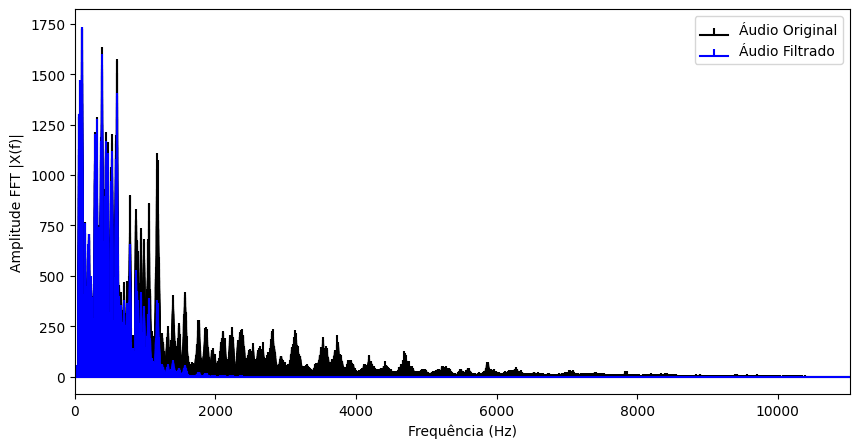

In [ ]:
# Plotando a porção positiva da FFT do sinal filtrado sobreposto à FFT do sinal original
plt.figure(figsize = (10, 5))
fft_orig=plt.stem(array_freq, np.abs(fft_audio), 'k', \
         markerfmt=" ", basefmt="-k")
fft_filt=plt.stem(array_freq, np.abs(fft_audio_filtrado), 'b', \
         markerfmt=" ", basefmt="-b")
plt.xlabel('Frequência (Hz)')
plt.ylabel('Amplitude FFT |X(f)|')
plt.legend([fft_orig, fft_filt],['Áudio Original','Áudio Filtrado'])
plt.xlim(0, taxa_amostragem/2)

Repare que o sinal filtrado apresenta uma pequena atenuação antes da frequência de corte, e ainda apresenta componentes acima da frequência de corte. Isso é natural, já que o filtro é de ordem baixa, fazendo com que a atenuação não seja tão alta. Dessa forma, ainda existirão algumas componentes acima da frequência de corte, devido à não idealidade do filtro.

# Atividade

Uma forma de converter um sinal de áudio digital em um som é utilizando alto-falantes. Um equipamento que pode ser construído para esse próposito são caixas de som, as quais podem ser construídas com mais de 1 alto-falante, os quais são dispostos fisicamente e configurados eletronicamente para reproduzir uma parte específica do espectro de frequências do sinal de áudio. Por exemplo, em uma caixa de som com 2 alto-falantes (tweeter e whoofer), cada alto-falante é especializado para reprodução de uma faixa de frequências, com o sinal de áudio devendo ser dividido em 2 sinais, o que é alcançado utilizando um divisor de frequências (*crossover*). Com isso, somente as freqüências adequadas a cada alto-falante são aplicadas a a eles.

Por exemplo, em um sistema duas vias (com dois alto-falantes), ao definirmos a freqüência de corte $f_c=1200$ Hz, apenas as freqüências acima de $f_c$ serão encaminhadas para o primeiro alto-falante (tweeter), enquanto as frequências abaixo de $f_c$ irão para o segundo alto-falante (whoofer). Idealmente, os sinais que foram separados para reprodução em vias diferentes, deverão reproduzir perfeitamente o sinal original após a superposição das duas ondas acústicas no ambiente.

O sistema eletrônico de divisão de frequências, popularmente conhecido como *crossover* é composto de um filtro passa-baixas e um passa-altas, com frequência de corte escolhida com base nas características dos alto-falantes e na arquitetura da caixa acústica. Considerando que desejamos que a frequência de corte para nosso projeto seja $f_c=1200$ Hz, simule o funcionamento desse divisor de frequências, realizando as seguintes tarefas:
 1. Filtrando o sinal de áudio e obtendo o sinal que seria aplicado à cada alto-falante;
 2. Mostrando que cada sinal filtrado cumpre a função desejada por meio dos coeficientes da sua FFT;
 3. Mostrando que a soma dos dois canais de áudio retorna um sinal próximo ao original, o que é mostrado por meio da FFT desse sinal resultante.

In [ ]:
# Implementação